# **I. EDA**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Downloads/UDAI/data.csv', encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- InvoiceNo: Đây là cột kiểu dữ liệu đối tượng chứa số hóa đơn cho mỗi giao dịch. Mỗi số hóa đơn có thể biểu thị nhiều mặt hàng được mua trong một giao dịch duy nhất.
- StockCode: Cột kiểu dữ liệu đối tượng biểu thị mã sản phẩm cho từng mặt hàng.
- Description: Cột này, cũng là một kiểu dữ liệu đối tượng, chứa mô tả về các sản phẩm. Cột này có một số giá trị bị thiếu, với 540.455 mục không phải null trong số 541.909 mục.
- Quantity: Đây là một cột số nguyên biểu thị số lượng sản phẩm được mua trong mỗi giao dịch.
- InvoiceDate: Cột datetime ghi lại ngày và giờ của mỗi giao dịch.
- UnitPrice: Cột float biểu thị đơn giá của mỗi sản phẩm.
- CustomerID: Cột float chứa ID khách hàng cho mỗi giao dịch. Cột này có số lượng giá trị bị thiếu đáng kể, chỉ có 406.829 mục không phải null trong số 541.909 mục.
- Country: Cột đối tượng ghi lại quốc gia nơi diễn ra mỗi giao dịch.

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [6]:
df.shape

(541909, 8)

In [7]:
for i in df.select_dtypes(include = 'object').columns:
  print(df[i].value_counts())
  print("***"*10)

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
581483        1
581566        1
C581499       1
C536383       1
C536379       1
Name: count, Length: 25900, dtype: int64
******************************
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
85179a       1
23617        1
90214U       1
47591b       1
72802c       1
Name: count, Length: 4070, dtype: int64
******************************
Description
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
ANT SILVER TURQUOISE BOUDICCA RING       1
Damages                                  1
Found by jackie                          1
water damaged                            1
lost in space                            1
Name: count

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [9]:
df.describe(include = 'object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


Quantity:
- Số lượng sản phẩm trung bình trong một giao dịch là khoảng 9,55.
- Số lượng có phạm vi rộng, với giá trị tối thiểu là -80995 và giá trị tối đa là 80995. Các giá trị âm biểu thị các đơn hàng đã trả lại hoặc đã hủy, cần được xử lý phù hợp.
- Độ lệch chuẩn khá lớn, biểu thị sự phân tán đáng kể trong dữ liệu. Sự hiện diện của các giá trị ngoại lệ được biểu thị bằng sự chênh lệch lớn giữa giá trị tối đa và giá trị phần trăm thứ 75.

UnitPrice:
- Giá đơn vị trung bình của các sản phẩm là khoảng 4,61.
- Giá đơn vị cũng cho thấy phạm vi rộng, từ -11062,06 đến 38970, điều này cho thấy sự hiện diện của lỗi hoặc nhiễu trong dữ liệu, vì giá âm không có ý nghĩa.
- Tương tự như cột Số lượng, sự hiện diện của các giá trị ngoại lệ được biểu thị bằng sự chênh lệch lớn giữa giá trị tối đa và giá trị phần trăm thứ 75.

CustomerID:
- Có 406829 mục nhập không phải null, biểu thị các giá trị bị thiếu trong tập dữ liệu cần được giải quyết.
- ID khách hàng nằm trong khoảng từ 12346 đến 18287, giúp xác định những khách hàng duy nhất.

InvoiceNo:
- Có 25900 số hóa đơn duy nhất, biểu thị 25900 giao dịch riêng biệt.
- Số hóa đơn thường xuyên nhất là 573585, xuất hiện 1114 lần, có thể biểu thị một giao dịch lớn hoặc một đơn hàng có nhiều mặt hàng.

StockCode:
- Có 4070 mã kho duy nhất biểu thị các sản phẩm khác nhau.
- Mã kho thường xuyên nhất là 85123A, xuất hiện 2313 lần trong tập dữ liệu.

Description:
- Có 4223 mô tả sản phẩm duy nhất.
- Mô tả sản phẩm thường gặp nhất là "WHITE HANGING HEART T-LIGHT HOLDER", xuất hiện 2369 lần.
- Có một số giá trị bị thiếu trong cột này cần được xử lý.

Country:
- Các giao dịch đến từ 38 quốc gia khác nhau, với phần lớn các giao dịch (khoảng 91,4%) có nguồn gốc từ Vương quốc Anh.

# **II. Data Processing**

In [11]:
df.isna().sum()/df.shape[0]*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [12]:
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


- Quá trình phân cụm dựa trên hành vi và sở thích của khách hàng, nên việc có dữ liệu chính xác về mã định danh khách hàng là rất quan trọng. Do đó, việc xóa các hàng có CustomerID bị thiếu có vẻ là cách tiếp cận hợp lý nhất để duy trì tính toàn vẹn của các cụm và quá trình phân tích.
- Có sự không nhất quán trong dữ liệu khi cùng một StockCode không phải lúc nào cũng có cùng một Description. Với những sự không nhất quán này, việc tính toán các mô tả bị thiếu dựa trên StockCode có thể không đáng tin cậy. Hơn nữa, vì tỷ lệ phần trăm bị thiếu khá thấp, nên sẽ thận trọng hơn nếu xóa các hàng có Description bị thiếu

In [13]:
df = df.dropna(subset=['CustomerID', 'Description'])

In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.duplicated().sum()

np.int64(5225)

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(401604, 8)

Xác định đến các giao dịch đã bị hủy bằng cách lọc các hàng mà InvoiceNo bắt đầu bằng "C".

In [18]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

In [19]:
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


- Tất cả số lượng trong các giao dịch bị hủy đều là số âm, cho biết đây thực sự là các đơn hàng đã bị hủy.
- Cột UnitPrice có mức chênh lệch đáng kể, cho thấy nhiều loại sản phẩm, từ giá trị thấp đến cao, đều là một phần của các giao dịch bị hủy.

In [20]:
df.loc[df['Quantity'] < 0, 'Quantity'] = 0

In [21]:
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

print(cancelled_percentage)

2.209141343213713


In [22]:
# xóa các bản ghi là cancel
df = df[df['Transaction_Status'] == 'Completed']

In [23]:
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

print(numeric_char_counts_in_unique_codes)

5    3659
0       5
1       1
Name: count, dtype: int64


In [24]:
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

for code in anomalous_stock_codes:
    print(code)

POST
C2
M
BANK CHARGES
PADS
DOT


- Phần lớn các mã chứa đúng 5 ký tự số, có vẻ như đây là định dạng chuẩn để biểu diễn mã sản phẩm trong tập dữ liệu này.
- 7 mã  không chứa ký tự số và 1 mã chứng khoán chỉ chứa 1 ký tự số.
- Các mã này có vẻ đại diện cho các giao dịch không phải sản phẩm như "BANK CHARGES", "POST" (có thể là phí bưu chính)
- Loại trừ những bản ghi có mã bất thường này khỏi tập dữ liệu.

In [25]:
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [26]:
df['UnitPrice'].describe()

count    391183.000000
mean          2.874130
std           4.284639
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

In [27]:
df = df[df['UnitPrice'] > 0]

**Tính RFM**

In [28]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDay'] = df['InvoiceDate'].dt.date

customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()
most_recent_date = df['InvoiceDay'].max()

customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

customer_data['Recency'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [29]:
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')

In [30]:
df['Monetary'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Monetary'].sum().reset_index()

customer_data = pd.merge(customer_data, total_spend, on='CustomerID')

In [31]:
customer_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1437.24
3,12349.0,18,1,1457.55
4,12350.0,310,1,294.40


In [32]:
customer_data.drop(columns=['CustomerID'], inplace=True)

In [33]:
!pip install scikit-learn
from sklearn.ensemble import IsolationForest


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
model = IsolationForest(contamination=0.05, random_state=0)

customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

In [35]:
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [38]:
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data_cleaned)

In [39]:
from sklearn.metrics import silhouette_score

# **III. Model**

## 1. Kmeans

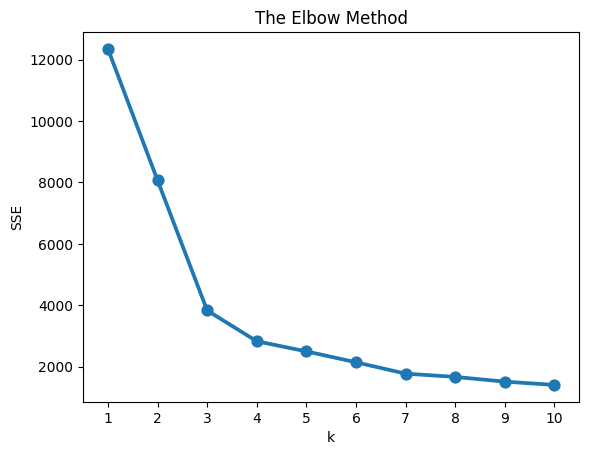

In [41]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    sse[k] = kmeans.inertia_

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()


In [42]:
Kmodel = KMeans(n_clusters=3, init='k-means++', max_iter=100, n_init=10 ,random_state=42)
Kmodel.fit(customer_data_scaled)

KMeans(max_iter=100, n_clusters=3, n_init=10, random_state=42)

In [43]:
customer_data_cleaned['KCluster'] = Kmodel.labels_
customer_data_cleaned.head()

,Recency,Frequency,Monetary,KCluster
0,2,7,4310.00,1
1,75,4,1437.24,0
2,18,1,1457.55,0
3,310,1,294.40,2
4,36,7,1385.74,1


In [44]:
customer_data_cleaned.groupby('KCluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(2)

,Recency,Frequency,Monetary
KCluster,,,
0,49.57,2.47,738.32
1,28.50,8.07,3133.57
2,251.49,1.44,410.44


In [45]:
!pip install plotly
import plotly.graph_objects as go


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
cluster_0 = customer_data_cleaned[customer_data_cleaned['KCluster'] == 0]
cluster_1 = customer_data_cleaned[customer_data_cleaned['KCluster'] == 1]
cluster_2 = customer_data_cleaned[customer_data_cleaned['KCluster'] == 2]

fig = go.Figure()

colors = ['blue', 'red', 'green']  

fig.add_trace(go.Scatter3d(x=cluster_0['Recency'], y=cluster_0['Frequency'], z=cluster_0['Monetary'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['Recency'], y=cluster_1['Frequency'], z=cluster_1['Monetary'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['Recency'], y=cluster_2['Frequency'], z=cluster_2['Monetary'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

fig.update_layout(
    title=dict(text='Trực quan hóa 3D các cụm khách hàng dựa trên RFM', x=0.5),  
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='Recency'), 
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='Frequency'), 
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='Monetary'),
    ),
    width=900,
    height=800
)

# Hiển thị biểu đồ
fig.show()

In [47]:
!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
num_observations = len(customer_data_scaled)

X = customer_data_scaled
clusters = customer_data_cleaned['KCluster']

sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        4117        |
|    Silhouette Score     | 0.4844959374836404 |
| Calinski Harabasz Score | 4576.935004790457  |
|  Davies Bouldin Score   | 0.7286125484217614 |
+-------------------------+--------------------+


In [49]:
X_cluster_scaled = customer_data_scaled

experiments = []

for k in [3, 4, 5, 6, 7]:  
    for init_method in ['k-means++', 'random']:
        for max_iter in [100, 200, 300]:
            for n_init in [10, 20]:
                model_kmeans = KMeans(n_clusters=k, init=init_method, max_iter=max_iter, n_init=n_init, random_state=42)
                labels = model_kmeans.fit_predict(X_cluster_scaled)
                sil_score = silhouette_score(X_cluster_scaled, labels)
                davies_bouldin = davies_bouldin_score(X_cluster_scaled, labels)
                calinski_harabasz = calinski_harabasz_score(X_cluster_scaled, labels)
                experiments.append([k, init_method, max_iter, n_init, sil_score, davies_bouldin, calinski_harabasz])

score = pd.DataFrame(experiments, columns=['k', 'init', 'max_iter', 'n_init', 'Silhouette Score', 'Davies-Bouldin Score', 'Calinski-Harabasz Score'])

print(score.sort_values(by='Silhouette Score', ascending=False))

    k       init  max_iter  n_init  Silhouette Score  Davies-Bouldin Score  \
0   3  k-means++       100      10          0.484496              0.728613   
1   3  k-means++       100      20          0.484496              0.728613   
2   3  k-means++       200      10          0.484496              0.728613   
3   3  k-means++       200      20          0.484496              0.728613   
4   3  k-means++       300      10          0.484496              0.728613   
5   3  k-means++       300      20          0.484496              0.728613   
6   3     random       100      10          0.484429              0.728708   
7   3     random       100      20          0.484429              0.728708   
8   3     random       200      10          0.484429              0.728708   
9   3     random       200      20          0.484429              0.728708   
10  3     random       300      10          0.484429              0.728708   
11  3     random       300      20          0.484429            

In [50]:
score.to_excel("ModelScore.xlsx", index=False)

C:\Users\LOQ\AppData\Local\Temp\ipykernel_17304\1947335351.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




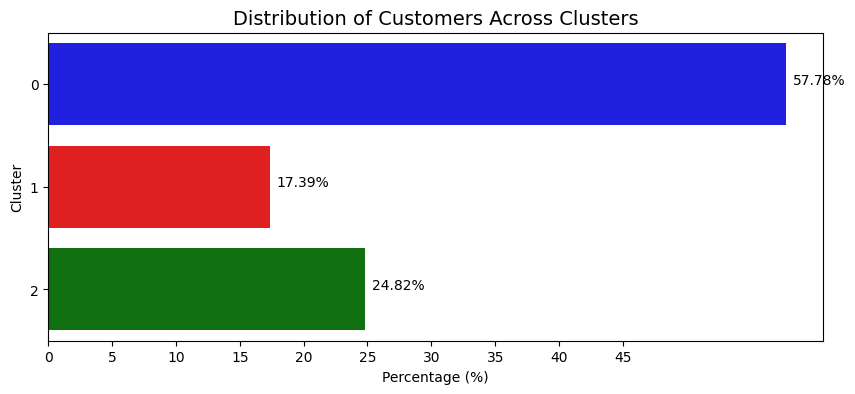

In [51]:
cluster_percentage = (customer_data_cleaned['KCluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

plt.show()

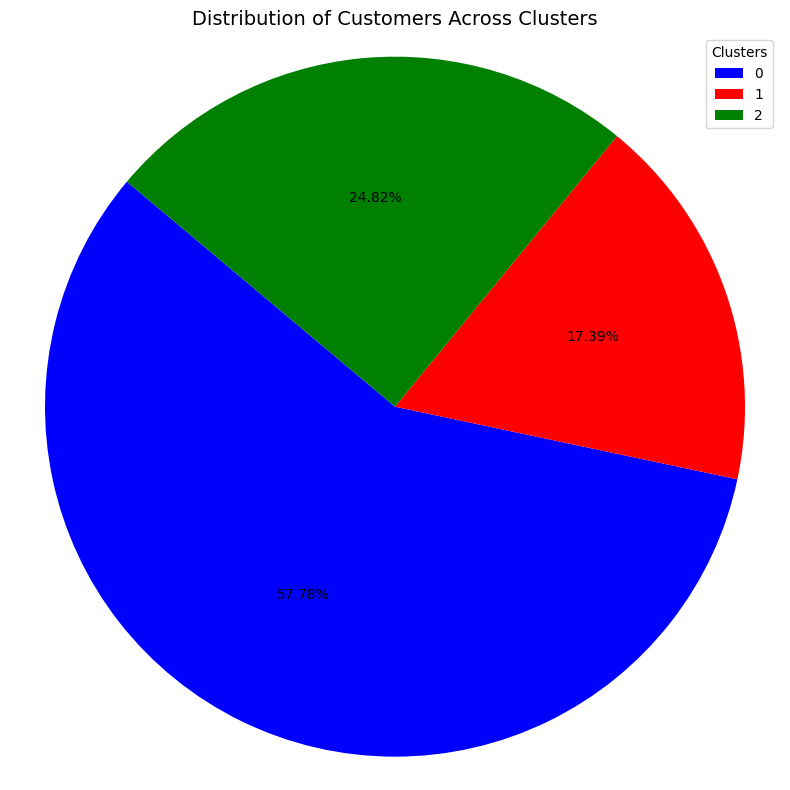

In [52]:
plt.figure(figsize=(8, 8))

patches, texts, autotexts = plt.pie(cluster_percentage['Percentage'], 
                                    labels=None,  
                                    autopct='%1.2f%%', 
                                    startangle=140,
                                    colors=colors)


plt.legend(patches, cluster_percentage['Cluster'], title="Clusters", loc="best")
plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.axis('equal')  
plt.tight_layout()
plt.show()



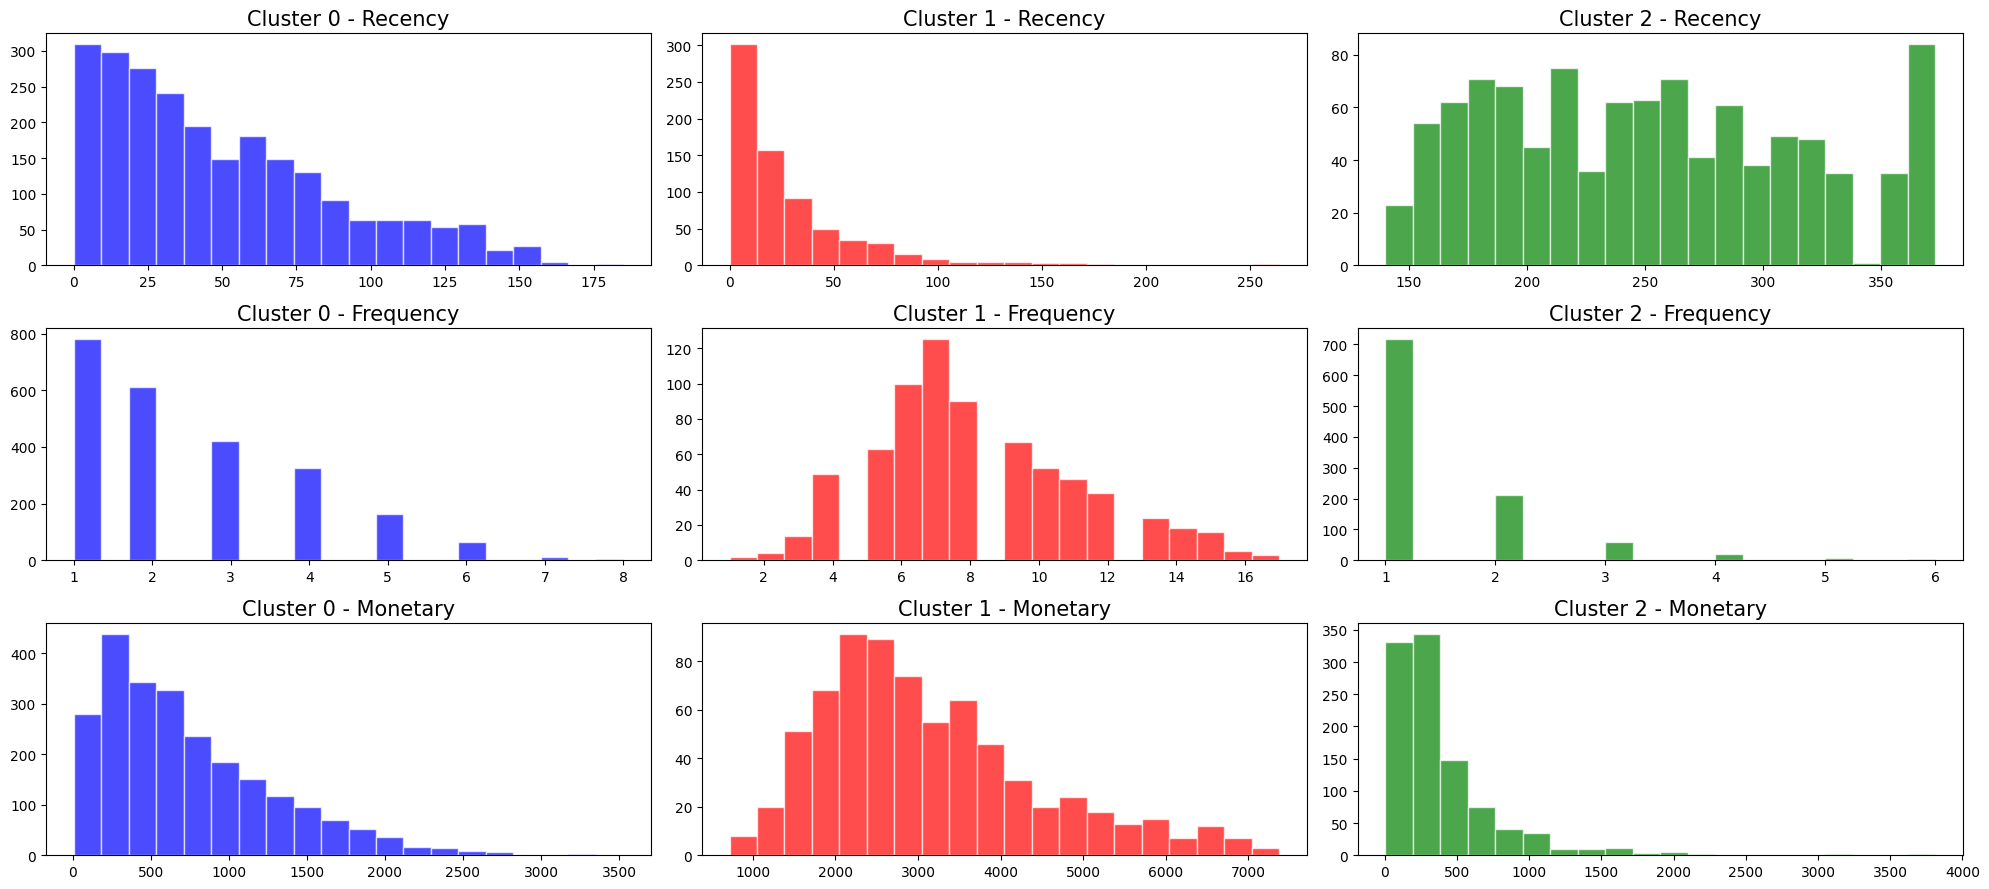

In [53]:
features = customer_data_cleaned.columns[0:3]
clusters = customer_data_cleaned['KCluster'].unique()
clusters.sort()

n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['KCluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

plt.tight_layout()
plt.show()

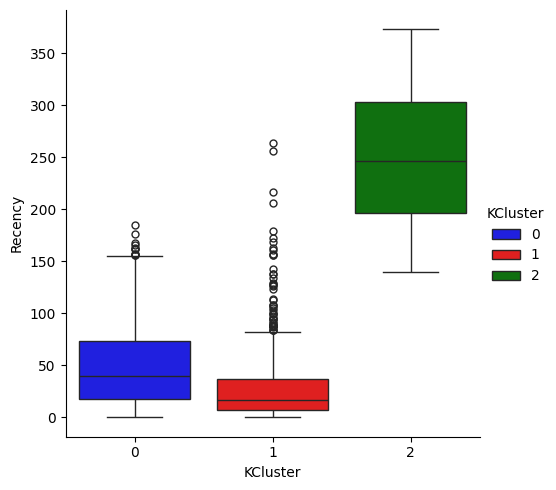

In [54]:
sns.catplot(x="KCluster",y = "Recency", hue="KCluster", kind="box", palette=['blue', 'red', 'green'], data=customer_data_cleaned)

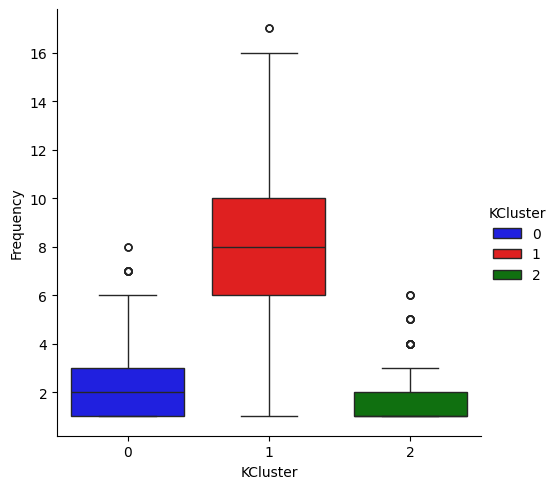

In [55]:
sns.catplot(x="KCluster",y = "Frequency", hue="KCluster", kind="box", palette=['blue', 'red', 'green'], data=customer_data_cleaned)

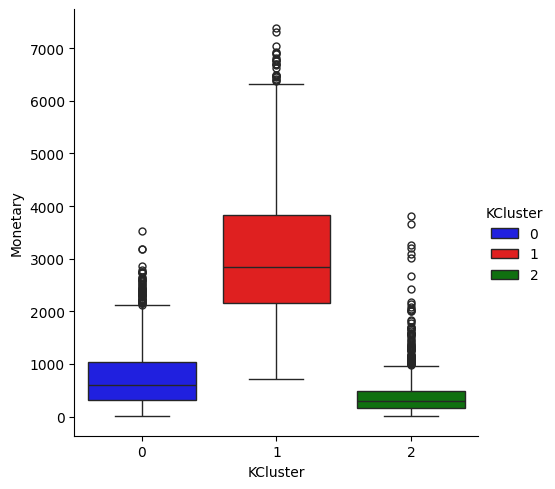

In [56]:
sns.catplot(x="KCluster",y = "Monetary", hue="KCluster", kind="box",palette=['blue', 'red', 'green'],  data=customer_data_cleaned)

In [57]:
import pickle
cluster_labels = {
    1: "Vip",
    0: "Phổ thông",
    2: "Rời bỏ"
}

# Lưu mapping này cùng với model
with open("cluster_labels.pkl", "wb") as f:
    pickle.dump(cluster_labels, f)

In [58]:
# Lưu model KMeans
with open("model_kmeans.pkl", "wb") as model_file:
    pickle.dump(Kmodel, model_file)

# Lưu scaler
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model và Scaler đã được lưu!")

Model và Scaler đã được lưu!


## 2. BSCSAN

In [62]:
from sklearn.cluster import DBSCAN

In [73]:
customer_data_cleaned

,Recency,Frequency,Monetary,KCluster
0,2,7,4310.00,1
1,75,4,1437.24,0
2,18,1,1457.55,0
3,310,1,294.40,2
4,36,7,1385.74,1
...,...,...,...,...
4112,73,1,173.90,0
4113,277,1,180.60,2
4114,180,1,80.82,2
4115,7,2,178.05,0


In [64]:
r_labels = range(4, 0, -1)
r_groups = pd.qcut(customer_data_cleaned['Recency'], q=4, labels=r_labels, duplicates='drop')

f_labels = range(1, 5)
f_groups = pd.qcut(customer_data_cleaned['Frequency'], q=4, labels=False, duplicates='drop')

m_labels = range(1, 5)
m_groups = pd.qcut(customer_data_cleaned['Monetary'], q=4, labels=m_labels, duplicates='drop')

In [65]:
customer_data_cleaned['R'] = r_groups.values
customer_data_cleaned['F'] = f_groups.values
customer_data_cleaned['M'] = m_groups.values

In [66]:
X = customer_data_cleaned[['R', 'F', 'M']]
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN()

In [72]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40])

In [73]:
labels = dbscan.labels_
customer_data_cleaned['DCluster'] = labels

In [79]:
customer_data_cleaned

,Recency,Frequency,Monetary,KCluster,GMMCluster,HCluster,R,F,M,DCluster
0,2,7,4310.00,1,2,0,4,2,4,0
1,75,4,1437.24,0,1,1,2,1,4,1
2,18,1,1457.55,0,1,1,4,0,4,2
3,310,1,294.40,2,0,2,1,0,2,3
4,36,7,1385.74,1,2,0,3,2,3,4
...,...,...,...,...,...,...,...,...,...,...
4112,73,1,173.90,0,0,1,2,0,1,28
4113,277,1,180.60,2,0,2,1,0,1,5
4114,180,1,80.82,2,0,2,1,0,1,5
4115,7,2,178.05,0,1,1,4,0,1,11


In [74]:
sil_score_d = silhouette_score(customer_data_scaled, labels)
davies_score_d = davies_bouldin_score(customer_data_scaled, labels)
calinski_score_d = calinski_harabasz_score(customer_data_scaled, labels)

print(f"DBSCAN Silhouette Score: {sil_score_d:.4f}")
print(f"DBSCAN Davies-Bouldin Score: {davies_score_d:.4f}")
print(f"DBSCAN Calinski-Harabasz Score: {calinski_score_d:.4f}")

DBSCAN Silhouette Score: 0.0186
DBSCAN Davies-Bouldin Score: 2.6534
DBSCAN Calinski-Harabasz Score: 427.1755


## 3. GMM

In [45]:
from sklearn.mixture import GaussianMixture

In [77]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(customer_data_scaled)

customer_data_cleaned['GMMCluster'] = gmm_labels

sil_score_gmm = silhouette_score(customer_data_scaled, gmm_labels)
davies_score_gmm = davies_bouldin_score(customer_data_scaled, gmm_labels)
calinski_score_gmm = calinski_harabasz_score(customer_data_scaled, gmm_labels)

print(f"GMM Silhouette Score: {sil_score_gmm:.4f}")
print(f"GMM Davies-Bouldin Score: {davies_score_gmm:.4f}")
print(f"GMM Calinski-Harabasz Score: {calinski_score_gmm:.4f}")

GMM Silhouette Score: 0.2171
GMM Davies-Bouldin Score: 1.2241
GMM Calinski-Harabasz Score: 1713.2519


## 4. Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
h_labels = hierarchical.fit_predict(customer_data_scaled)

customer_data_cleaned['HCluster'] = h_labels

sil_score_h = silhouette_score(customer_data_scaled, h_labels)
davies_score_h = davies_bouldin_score(customer_data_scaled, h_labels)
calinski_score_h = calinski_harabasz_score(customer_data_scaled, h_labels)

print(f"Hierarchical Clustering Silhouette Score: {sil_score_h:.4f}")
print(f"Hierarchical Clustering Davies-Bouldin Score: {davies_score_h:.4f}")
print(f"Hierarchical Clustering Calinski-Harabasz Score: {calinski_score_h:.4f}")

Hierarchical Clustering Silhouette Score: 0.4378
Hierarchical Clustering Davies-Bouldin Score: 0.7883
Hierarchical Clustering Calinski-Harabasz Score: 4094.2602
